In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

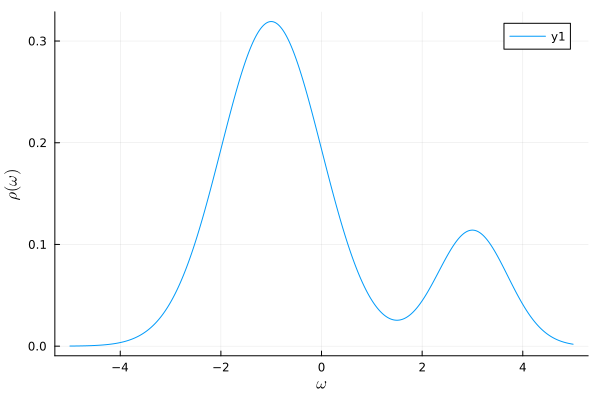

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     9.050531e-01     5.094001e+00
 * time: 0.018965959548950195
     1     8.152167e-01     3.982333e+00
 * time: 1.8625819683074951
     2     4.035779e-01     5.450129e+00
 * time: 2.27034592628479
     3     1.910854e-01     2.158235e+00
 * time: 2.5404000282287598
     4     1.565320e-01     2.165017e-01
 * time: 2.6720330715179443
     5     1.561898e-01     1.834678e-02
 * time: 2.9355030059814453
     6     1.561841e-01     4.391178e-03
 * time: 3.1719319820404053
     7     1.561839e-01     1.240366e-03
 * time: 3.4306650161743164
     8     1.561839e-01     3.309993e-04
 * time: 3.5733940601348877
     9     1.561839e-01     3.492742e-05
 * time: 3.6923999786376953
    10     1.561839e-01     5.151171e-06
 * time: 3.9048168659210205
    11     1.561839e-01     1.124102e-06
 * time: 4.13181209564209
    12     1.561839e-01     2.750608e-07
 * time: 4.3567070960998535
    13     1.561839e-01     2.953443e

In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     1.561839e-01     6.243122e-09
 * time: 5.0067901611328125e-5
max_theta=0.1628134357327177670612707285767895569134
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.561839e-01     1.233090e+00
 * time: 5.698204040527344e-5
     1     1.498561e-01     8.958772e-01
 * time: 0.17894697189331055
     2     1.400685e-01     9.291370e-01
 * time: 0.30712008476257324
     3     1.210241e-01     9.342923e-01
 * time: 0.6335911750793457
     4     3.871618e-02     7.831022e-01
 * time: 0.8671751022338867
     5     3.000783e-02     3.820936e-01
 * time: 1.1413381099700928
     6     2.746334e-02     1.020176e-01
 * time: 1.3646900653839111
     7     2.727185e-02     1.662435e-02
 * time: 1.5843961238861084
     8     2.726284e-02     8.507493e-03
 * time: 1.8152589797973633
     9     2.726204e-02     2.783118e-03
 * time: 1.9493601322174072
    10     2.726197e-02     9.027024e-04
 * time: 2.1831550

    12     2.378011e-04     3.730892e-03
 * time: 3.161393880844116
    13     2.366565e-04     6.101081e-03
 * time: 3.47027587890625
    14     2.356797e-04     8.083295e-03
 * time: 3.8327879905700684
    15     2.339290e-04     6.693717e-03
 * time: 4.151773929595947
    16     2.326995e-04     5.773034e-03
 * time: 4.4775779247283936
    17     2.306008e-04     6.514913e-03
 * time: 4.82653284072876
    18     2.296039e-04     6.647206e-03
 * time: 5.1321938037872314
    19     2.290375e-04     4.212432e-03
 * time: 5.493691921234131
    20     2.287212e-04     1.109249e-03
 * time: 5.807365894317627
    21     2.286187e-04     2.391163e-03
 * time: 6.146150827407837
    22     2.284418e-04     3.690695e-03
 * time: 6.517644882202148
    23     2.280147e-04     6.860283e-03
 * time: 6.83088493347168
    24     2.272074e-04     1.086931e-02
 * time: 7.139217853546143
    25     2.254325e-04     1.564949e-02
 * time: 7.48804783821106
    26     2.228912e-04     1.553435e-02
 * time:

    33     4.059631e-05     4.151182e-04
 * time: 11.380198001861572
    34     4.059241e-05     2.419244e-04
 * time: 11.77348804473877
    35     4.058992e-05     3.740099e-04
 * time: 12.112539052963257
    36     4.058567e-05     5.972880e-04
 * time: 12.515992879867554
    37     4.057994e-05     8.888270e-04
 * time: 12.866436958312988
    38     4.056834e-05     1.392476e-03
 * time: 13.278619050979614
    39     4.055144e-05     1.919555e-03
 * time: 13.655493021011353
    40     4.051990e-05     2.711315e-03
 * time: 14.03938889503479
    41     4.047443e-05     3.528629e-03
 * time: 14.401591062545776
    42     4.039079e-05     4.755943e-03
 * time: 14.786723852157593
    43     4.027028e-05     5.942051e-03
 * time: 15.136070966720581
    44     4.005836e-05     7.356686e-03
 * time: 15.521744966506958
    45     3.973943e-05     8.420428e-03
 * time: 15.848619937896729
    46     3.919065e-05     7.791129e-03
 * time: 16.218014001846313
    47     3.841913e-05     2.406561

     5     2.555648e-05     8.172183e-04
 * time: 1.5595190525054932
     6     2.550712e-05     9.443838e-04
 * time: 1.8572709560394287
     7     2.546863e-05     8.057346e-04
 * time: 2.1710948944091797
     8     2.539669e-05     1.113988e-03
 * time: 2.4721710681915283
     9     2.532277e-05     1.010624e-03
 * time: 2.770709991455078
    10     2.526056e-05     1.254672e-03
 * time: 3.0415289402008057
    11     2.503606e-05     1.040183e-03
 * time: 3.3032569885253906
    12     2.497802e-05     4.998467e-04
 * time: 3.601716995239258
    13     2.476523e-05     1.989261e-03
 * time: 3.9967539310455322
    14     2.461190e-05     2.974824e-03
 * time: 4.28192400932312
    15     2.438244e-05     2.034340e-03
 * time: 4.555593967437744
    16     2.431678e-05     1.288254e-03
 * time: 4.825303077697754
    17     2.428218e-05     1.351380e-03
 * time: 5.2794508934021
    18     2.425651e-05     8.778523e-04
 * time: 5.751008033752441
    19     2.423529e-05     1.020824e-03
 * 

    32     2.103339e-05     3.164093e-04
 * time: 12.174129962921143
    33     2.102645e-05     5.586496e-04
 * time: 12.637363910675049
    34     2.102017e-05     7.588975e-04
 * time: 13.131096839904785
    35     2.100881e-05     1.000606e-03
 * time: 13.611037015914917
    36     2.099950e-05     1.015121e-03
 * time: 14.052956819534302
    37     2.098483e-05     7.639061e-04
 * time: 14.518922805786133
    38     2.096523e-05     5.088268e-04
 * time: 15.023518800735474
    39     2.096231e-05     2.746110e-04
 * time: 15.314981937408447
    40     2.095740e-05     4.384250e-04
 * time: 15.745766878128052
    41     2.095086e-05     8.647827e-04
 * time: 16.20845890045166
    42     2.093776e-05     1.140938e-03
 * time: 16.697784900665283
    43     2.092273e-05     1.458979e-03
 * time: 17.139526844024658
    44     2.090319e-05     1.852408e-03
 * time: 17.603019952774048
    45     2.087960e-05     2.174322e-03
 * time: 18.080079793930054
    46     2.084664e-05     2.24112

    31     2.016846e-05     3.802861e-04
 * time: 13.388369798660278
    32     2.016407e-05     3.682996e-04
 * time: 13.885885953903198
    33     2.016291e-05     1.077828e-04
 * time: 14.282693862915039
    34     2.016195e-05     1.921740e-04
 * time: 14.820677995681763
    35     2.016138e-05     2.291019e-04
 * time: 15.373693943023682
    36     2.016019e-05     3.472162e-04
 * time: 15.963669776916504
    37     2.015931e-05     3.445477e-04
 * time: 16.465966939926147
    38     2.015768e-05     3.594473e-04
 * time: 17.019832849502563
    39     2.015548e-05     3.448482e-04
 * time: 17.570101976394653
    40     2.015089e-05     2.298837e-04
 * time: 18.12174391746521
    41     2.015003e-05     1.778016e-04
 * time: 18.46875500679016
    42     2.014916e-05     1.707548e-04
 * time: 19.018955945968628
    43     2.014864e-05     2.781427e-04
 * time: 19.517252922058105
    44     2.014750e-05     3.084243e-04
 * time: 20.06249189376831
    45     2.014659e-05     3.592103e

    12     1.989957e-05     1.328351e-04
 * time: 4.470131874084473
    13     1.989808e-05     1.155012e-04
 * time: 4.829840898513794
    14     1.989643e-05     1.082665e-04
 * time: 5.191350936889648
    15     1.989558e-05     1.617414e-04
 * time: 5.554299831390381
    16     1.989408e-05     8.153297e-05
 * time: 5.911325931549072
    17     1.989029e-05     3.124854e-04
 * time: 6.531887054443359
    18     1.988924e-05     2.580992e-04
 * time: 6.969688892364502
    19     1.988805e-05     1.972197e-04
 * time: 7.424437046051025
    20     1.988617e-05     1.860153e-04
 * time: 7.9305219650268555
    21     1.988217e-05     1.431631e-04
 * time: 8.48127794265747
    22     1.988023e-05     2.702350e-04
 * time: 9.039834976196289
    23     1.987812e-05     3.286846e-04
 * time: 9.601603984832764
    24     1.987606e-05     8.009561e-05
 * time: 10.155752897262573
    25     1.987538e-05     1.489337e-04
 * time: 10.680721998214722
    26     1.987385e-05     2.771513e-04
 * ti

   132     1.980660e-05     8.353921e-05
 * time: 66.21902298927307
   133     1.980658e-05     1.003435e-04
 * time: 66.80871391296387
   134     1.980657e-05     1.050498e-04
 * time: 67.16427183151245
   135     1.980654e-05     1.257090e-04
 * time: 67.73667001724243
   136     1.980652e-05     1.314896e-04
 * time: 68.0958559513092
   137     1.980648e-05     1.568936e-04
 * time: 68.6612138748169
   138     1.980645e-05     1.639468e-04
 * time: 69.01685285568237
   139     1.980639e-05     1.952474e-04
 * time: 69.57307195663452
   140     1.980633e-05     2.038193e-04
 * time: 69.9372169971466
   141     1.980625e-05     2.424217e-04
 * time: 70.49905395507812
   142     1.980616e-05     2.527668e-04
 * time: 70.8681230545044
   143     1.980603e-05     3.003928e-04
 * time: 71.44789099693298
   144     1.980590e-05     3.127697e-04
 * time: 71.82194590568542
   145     1.980570e-05     3.715445e-04
 * time: 72.39706897735596
   146     1.980550e-05     3.861992e-04
 * time: 72

    72     1.975461e-05     9.829662e-05
 * time: 43.50964021682739
    73     1.975457e-05     9.961502e-05
 * time: 43.89637303352356
    74     1.975451e-05     1.299836e-04
 * time: 44.48352599143982
    75     1.975446e-05     1.331141e-04
 * time: 44.86291313171387
    76     1.975437e-05     1.631202e-04
 * time: 45.4681351184845
    77     1.975431e-05     1.666103e-04
 * time: 45.83518719673157
    78     1.975419e-05     1.962543e-04
 * time: 46.40673518180847
    79     1.975409e-05     1.989250e-04
 * time: 46.80726599693298
    80     1.975388e-05     2.142610e-04
 * time: 47.37341904640198
    81     1.975356e-05     1.970096e-04
 * time: 47.9822940826416
    82     1.975269e-05     1.648043e-04
 * time: 48.547975063323975
    83     1.975253e-05     4.197189e-05
 * time: 48.965617179870605
    84     1.975248e-05     2.481933e-05
 * time: 49.54351019859314
    85     1.975247e-05     2.593188e-05
 * time: 49.972809076309204
    86     1.975247e-05     1.420466e-05
 * tim

   193     1.974037e-05     1.625752e-04
 * time: 100.19582915306091
   194     1.974034e-05     1.797540e-04
 * time: 100.60577917098999
   195     1.974031e-05     1.879650e-04
 * time: 101.02888321876526
   196     1.974027e-05     2.079243e-04
 * time: 101.47418713569641
   197     1.974023e-05     2.172133e-04
 * time: 101.98503112792969
   198     1.974017e-05     2.404467e-04
 * time: 102.41858315467834
   199     1.974011e-05     2.509166e-04
 * time: 102.86489009857178
   200     1.974004e-05     2.780212e-04
 * time: 103.46388101577759
   201     1.973996e-05     2.897660e-04
 * time: 103.89032506942749
   202     1.973986e-05     3.214682e-04
 * time: 104.52704501152039
   203     1.973975e-05     3.345568e-04
 * time: 104.96842503547668
   204     1.973961e-05     3.717388e-04
 * time: 105.68159103393555
   205     1.973946e-05     3.861794e-04
 * time: 106.13499712944031
   206     1.973925e-05     4.298765e-04
 * time: 106.74408721923828
   207     1.973903e-05     4.4552

    71     1.971939e-05     7.424765e-05
 * time: 37.78265619277954
    72     1.971935e-05     9.313787e-05
 * time: 38.40347719192505
    73     1.971933e-05     9.530144e-05
 * time: 38.80401921272278
    74     1.971928e-05     1.084960e-04
 * time: 39.40463614463806
    75     1.971924e-05     1.086208e-04
 * time: 40.00336217880249
    76     1.971914e-05     1.126686e-04
 * time: 40.63353610038757
    77     1.971890e-05     8.164270e-05
 * time: 41.40530300140381
    78     1.971882e-05     7.738308e-05
 * time: 41.81173920631409
    79     1.971877e-05     3.209583e-05
 * time: 42.20104908943176
    80     1.971875e-05     1.799463e-05
 * time: 42.61853909492493
    81     1.971875e-05     1.269269e-05
 * time: 43.006664991378784
    82     1.971874e-05     2.418621e-05
 * time: 43.61078715324402
    83     1.971873e-05     1.887336e-05
 * time: 43.99548411369324
    84     1.971873e-05     2.757519e-05
 * time: 44.62995409965515
    85     1.971872e-05     2.667397e-05
 * tim

   192     1.971372e-05     7.658742e-05
 * time: 102.7031090259552
   193     1.971370e-05     9.624506e-05
 * time: 103.31075716018677
   194     1.971369e-05     9.415769e-05
 * time: 103.7026720046997
   195     1.971366e-05     1.182999e-04
 * time: 104.3357481956482
   196     1.971364e-05     1.156085e-04
 * time: 104.72511219978333
   197     1.971360e-05     1.452288e-04
 * time: 105.33241510391235
   198     1.971357e-05     1.417561e-04
 * time: 105.71015119552612
   199     1.971350e-05     1.783767e-04
 * time: 106.31388115882874
   200     1.971346e-05     1.738882e-04
 * time: 106.71209406852722
   201     1.971336e-05     2.182799e-04
 * time: 107.31854104995728
   202     1.971329e-05     2.123716e-04
 * time: 107.70822310447693
   203     1.971313e-05     2.669262e-04
 * time: 108.3112051486969
   204     1.971302e-05     2.593067e-04
 * time: 108.70186400413513
   205     1.971276e-05     3.223572e-04
 * time: 109.3071141242981
   206     1.971259e-05     3.128264e-0

    72     1.970386e-05     3.360544e-05
 * time: 38.99399185180664
    73     1.970384e-05     4.483175e-05
 * time: 39.62113690376282
    74     1.970380e-05     3.908518e-05
 * time: 40.464890003204346
    75     1.970379e-05     2.327730e-05
 * time: 40.8827109336853
    76     1.970378e-05     2.758001e-05
 * time: 41.30079889297485
    77     1.970378e-05     3.014835e-06
 * time: 41.73432493209839
    78     1.970377e-05     1.878577e-05
 * time: 42.35078191757202
    79     1.970377e-05     5.955300e-06
 * time: 42.77619194984436
    80     1.970376e-05     2.123772e-05
 * time: 43.41185784339905
    81     1.970376e-05     1.120696e-05
 * time: 43.82287287712097
    82     1.970376e-05     2.566990e-05
 * time: 44.46005201339722
    83     1.970376e-05     1.926218e-05
 * time: 44.86359190940857
    84     1.970375e-05     3.098848e-05
 * time: 45.508158922195435
    85     1.970375e-05     2.456605e-05
 * time: 45.92254996299744
    86     1.970374e-05     3.582614e-05
 * tim

   193     1.970125e-05     1.945712e-06
 * time: 108.14538097381592
   194     1.970125e-05     9.926111e-07
 * time: 108.57461094856262
   195     1.970125e-05     9.964444e-07
 * time: 109.20634984970093
   196     1.970125e-05     4.616665e-07
 * time: 109.63993978500366
   197     1.970125e-05     6.340689e-07
 * time: 110.29100584983826
   198     1.970125e-05     1.574110e-07
 * time: 110.7017719745636
   199     1.970125e-05     4.885970e-07
 * time: 111.34744095802307
   200     1.970125e-05     2.294142e-07
 * time: 111.77038788795471
   201     1.970125e-05     5.606996e-07
 * time: 112.44126796722412
   202     1.970125e-05     4.338513e-07
 * time: 112.84904193878174
   203     1.970125e-05     7.841357e-07
 * time: 113.58995485305786
   204     1.970125e-05     6.523608e-07
 * time: 114.05114579200745
   205     1.970125e-05     1.038676e-06
 * time: 114.73804092407227
   206     1.970125e-05     9.023835e-07
 * time: 115.20444893836975
   207     1.970125e-05     1.33470

    12     1.969639e-05     3.213118e-05
 * time: 5.540586948394775
    13     1.969637e-05     2.161897e-05
 * time: 6.154422998428345
    14     1.969634e-05     2.145657e-05
 * time: 6.8046228885650635
    15     1.969631e-05     2.070661e-05
 * time: 7.289088010787964
    16     1.969627e-05     3.033159e-05
 * time: 7.858453989028931
    17     1.969623e-05     1.812576e-05
 * time: 8.537214994430542
    18     1.969620e-05     2.299503e-05
 * time: 9.053170919418335
    19     1.969617e-05     1.723354e-05
 * time: 9.525808811187744
    20     1.969611e-05     2.685696e-05
 * time: 10.092834949493408
    21     1.969605e-05     1.728007e-05
 * time: 10.894073963165283
    22     1.969602e-05     3.212026e-05
 * time: 11.377059936523438
    23     1.969597e-05     8.290712e-05
 * time: 11.836711883544922
    24     1.969591e-05     3.680545e-05
 * time: 12.315038919448853
    25     1.969579e-05     2.753976e-05
 * time: 13.125305891036987
    26     1.969577e-05     2.133955e-05


   132     1.969396e-05     7.390823e-06
 * time: 77.47622179985046
   133     1.969396e-05     8.038489e-06
 * time: 77.94375395774841
   134     1.969396e-05     9.102646e-06
 * time: 78.37034487724304
   135     1.969396e-05     9.833358e-06
 * time: 78.81724095344543
   136     1.969396e-05     1.093748e-05
 * time: 79.27886199951172
   137     1.969396e-05     1.178942e-05
 * time: 79.71806597709656
   138     1.969396e-05     1.290524e-05
 * time: 80.17754197120667
   139     1.969396e-05     1.387880e-05
 * time: 80.62033486366272
   140     1.969396e-05     1.503842e-05
 * time: 81.07777094841003
   141     1.969396e-05     1.612081e-05
 * time: 81.51579880714417
   142     1.969395e-05     1.734672e-05
 * time: 81.97792387008667
   143     1.969395e-05     1.849572e-05
 * time: 82.42326188087463
   144     1.969395e-05     1.978628e-05
 * time: 82.86177587509155
   145     1.969395e-05     2.098317e-05
 * time: 83.3214418888092
   146     1.969395e-05     2.233885e-05
 * time:

   252     1.969259e-05     2.268636e-05
 * time: 148.54339790344238
   253     1.969259e-05     2.684305e-05
 * time: 149.2306878566742
   254     1.969258e-05     2.600290e-05
 * time: 149.70048785209656
   255     1.969258e-05     3.070896e-05
 * time: 150.40635180473328
   256     1.969258e-05     2.977905e-05
 * time: 150.89329886436462
   257     1.969258e-05     3.505457e-05
 * time: 151.57978296279907
   258     1.969258e-05     3.401601e-05
 * time: 152.03575801849365
   259     1.969258e-05     3.995309e-05
 * time: 152.70528101921082
   260     1.969257e-05     3.878484e-05
 * time: 153.1514549255371
   261     1.969257e-05     4.543959e-05
 * time: 153.83336901664734
   262     1.969257e-05     4.411301e-05
 * time: 154.27295684814453
   263     1.969256e-05     5.158384e-05
 * time: 154.9419457912445
   264     1.969256e-05     5.009024e-05
 * time: 155.38056778907776
   265     1.969256e-05     5.846514e-05
 * time: 156.06412196159363
   266     1.969255e-05     5.678806e

   372     1.968997e-05     2.416259e-04
 * time: 218.2484838962555
   373     1.968964e-05     2.483047e-04
 * time: 218.91197681427002
   374     1.968941e-05     2.607882e-04
 * time: 219.5676028728485
   375     1.968865e-05     2.506647e-04
 * time: 220.24872994422913
   376     1.968659e-05     1.752179e-04
 * time: 221.14584398269653
   377     1.968638e-05     1.094759e-04
 * time: 221.58512783050537
   378     1.968599e-05     7.411465e-05
 * time: 222.0488579273224
   379     1.968595e-05     4.748423e-05
 * time: 222.49252700805664
   380     1.968592e-05     4.534310e-05
 * time: 223.1805329322815
   381     1.968591e-05     2.126344e-05
 * time: 223.68668484687805
   382     1.968589e-05     2.590530e-05
 * time: 224.4395728111267
   383     1.968589e-05     1.280857e-05
 * time: 224.90393900871277
   384     1.968589e-05     1.453962e-05
 * time: 225.59418892860413
   385     1.968589e-05     8.460770e-06
 * time: 226.06943583488464
   386     1.968588e-05     8.096696e-0

    80     1.968288e-05     1.151806e-05
 * time: 52.848737955093384
    81     1.968288e-05     1.163883e-05
 * time: 53.32786202430725
    82     1.968288e-05     1.403906e-05
 * time: 54.02382206916809
    83     1.968288e-05     1.504116e-05
 * time: 54.51297688484192
    84     1.968287e-05     1.848860e-05
 * time: 55.24597907066345
    85     1.968287e-05     1.961730e-05
 * time: 55.701478004455566
    86     1.968287e-05     2.294985e-05
 * time: 56.416754961013794
    87     1.968287e-05     2.392270e-05
 * time: 56.9332070350647
    88     1.968286e-05     2.739516e-05
 * time: 57.747458934783936
    89     1.968286e-05     2.795871e-05
 * time: 58.21340298652649
    90     1.968285e-05     3.257727e-05
 * time: 58.989099979400635
    91     1.968285e-05     3.315617e-05
 * time: 59.47682499885559
    92     1.968285e-05     3.814719e-05
 * time: 60.19521403312683
    93     1.968284e-05     3.869847e-05
 * time: 60.688482999801636
    94     1.968284e-05     4.375800e-05
 *

   201     1.968172e-05     5.800177e-05
 * time: 125.65657305717468
   202     1.968171e-05     5.707918e-05
 * time: 126.15633487701416
   203     1.968171e-05     6.366812e-05
 * time: 127.08726000785828
   204     1.968170e-05     6.270207e-05
 * time: 127.7591769695282
   205     1.968170e-05     6.983318e-05
 * time: 128.5515100955963
   206     1.968169e-05     6.881440e-05
 * time: 129.0408968925476
   207     1.968169e-05     7.656296e-05
 * time: 129.72665405273438
   208     1.968168e-05     7.548417e-05
 * time: 130.22286796569824
   209     1.968167e-05     8.393200e-05
 * time: 130.9183259010315
   210     1.968167e-05     8.278149e-05
 * time: 131.4030020236969
   211     1.968166e-05     9.202339e-05
 * time: 132.09302806854248
   212     1.968165e-05     9.078611e-05
 * time: 132.5894570350647
   213     1.968164e-05     1.009422e-04
 * time: 133.3036298751831
   214     1.968163e-05     9.960329e-05
 * time: 133.77321100234985
   215     1.968161e-05     1.108326e-04


   321     1.967944e-05     2.355037e-05
 * time: 192.01065492630005
   322     1.967944e-05     2.366842e-05
 * time: 192.5367090702057
   323     1.967944e-05     2.505707e-05
 * time: 192.9970359802246
   324     1.967944e-05     2.518411e-05
 * time: 193.54681491851807
   325     1.967944e-05     2.665081e-05
 * time: 194.0971930027008
   326     1.967944e-05     2.678726e-05
 * time: 194.76398491859436
   327     1.967944e-05     2.833710e-05
 * time: 195.57780408859253
   328     1.967944e-05     2.848343e-05
 * time: 196.15434193611145
   329     1.967944e-05     3.012182e-05
 * time: 196.7818260192871
   330     1.967944e-05     3.027851e-05
 * time: 197.39960289001465
   331     1.967944e-05     3.201128e-05
 * time: 198.26835989952087
   332     1.967944e-05     3.217883e-05
 * time: 198.8773069381714
   333     1.967944e-05     3.401236e-05
 * time: 199.4442160129547
   334     1.967944e-05     3.419129e-05
 * time: 199.93923497200012
   335     1.967944e-05     3.613249e-05

   441     1.967661e-05     3.877430e-06
 * time: 266.5984070301056
   442     1.967661e-05     3.628105e-06
 * time: 267.2735369205475
   443     1.967661e-05     4.630484e-06
 * time: 268.04068207740784
   444     1.967661e-05     4.338736e-06
 * time: 268.664498090744
   445     1.967661e-05     5.366448e-06
 * time: 269.40537905693054
   446     1.967661e-05     4.936346e-06
 * time: 269.8895649909973
   447     1.967661e-05     7.001857e-06
 * time: 270.6367869377136
   448     1.967661e-05     6.629746e-06
 * time: 271.11601305007935
   449     1.967661e-05     8.147456e-06
 * time: 271.85134196281433
   450     1.967661e-05     7.791182e-06
 * time: 272.35476994514465
   451     1.967661e-05     1.034068e-05
 * time: 273.09837102890015
   452     1.967661e-05     1.010626e-05
 * time: 273.58708691596985
   453     1.967661e-05     1.126842e-05
 * time: 274.35153698921204
   454     1.967661e-05     1.100401e-05
 * time: 274.8833839893341
   455     1.967661e-05     1.372175e-05


    22     1.966807e-05     5.071881e-05
 * time: 11.975890874862671
    23     1.966805e-05     2.372836e-05
 * time: 12.475003957748413
    24     1.966802e-05     1.848833e-05
 * time: 13.010982036590576
    25     1.966797e-05     7.389013e-06
 * time: 13.528735876083374
    26     1.966791e-05     2.198691e-05
 * time: 14.272963047027588
    27     1.966783e-05     3.755502e-05
 * time: 15.105314016342163
    28     1.966780e-05     2.314096e-05
 * time: 16.1922869682312
    29     1.966778e-05     2.257271e-05
 * time: 17.00008988380432
    30     1.966770e-05     1.953046e-05
 * time: 17.794722080230713
    31     1.966765e-05     3.303847e-05
 * time: 18.56376600265503
    32     1.966753e-05     6.200102e-05
 * time: 19.306890964508057
    33     1.966745e-05     3.489515e-05
 * time: 19.835943937301636
    34     1.966743e-05     1.598585e-05
 * time: 20.60988688468933
    35     1.966740e-05     2.759260e-05
 * time: 21.366098880767822
    36     1.966733e-05     1.358368e-0

   143     1.966574e-05     4.627304e-05
 * time: 88.18904209136963
   144     1.966570e-05     4.236609e-05
 * time: 88.64475703239441
   145     1.966568e-05     3.013150e-05
 * time: 89.11092495918274
   146     1.966566e-05     3.212537e-05
 * time: 89.56631588935852
   147     1.966564e-05     2.185582e-05
 * time: 90.0434799194336
   148     1.966563e-05     2.295669e-05
 * time: 90.50177597999573
   149     1.966562e-05     1.319606e-05
 * time: 90.99106788635254
   150     1.966562e-05     1.513507e-05
 * time: 91.46732211112976
   151     1.966561e-05     8.381990e-06
 * time: 91.93925499916077
   152     1.966561e-05     1.201084e-05
 * time: 92.3764898777008
   153     1.966561e-05     6.842631e-06
 * time: 92.80945706367493
   154     1.966561e-05     1.023434e-05
 * time: 93.28715991973877
   155     1.966560e-05     6.493654e-06
 * time: 93.74703693389893
   156     1.966560e-05     9.498166e-06
 * time: 94.24331593513489
   157     1.966560e-05     7.507363e-06
 * time: 

   263     1.966537e-05     1.021052e-05
 * time: 148.5731999874115
   264     1.966537e-05     1.018354e-05
 * time: 149.063157081604
   265     1.966537e-05     1.091575e-05
 * time: 149.5265769958496
   266     1.966537e-05     1.089341e-05
 * time: 150.05480790138245
   267     1.966537e-05     1.165069e-05
 * time: 150.6457540988922
   268     1.966537e-05     1.163423e-05
 * time: 151.145024061203
   269     1.966537e-05     1.241848e-05
 * time: 151.59981989860535
   270     1.966537e-05     1.240795e-05
 * time: 152.114501953125
   271     1.966537e-05     1.322086e-05
 * time: 152.55765390396118
   272     1.966537e-05     1.321540e-05
 * time: 153.04051995277405
   273     1.966537e-05     1.405817e-05
 * time: 153.49206399917603
   274     1.966537e-05     1.405726e-05
 * time: 153.94046211242676
   275     1.966537e-05     1.493097e-05
 * time: 154.53221702575684
   276     1.966537e-05     1.493505e-05
 * time: 154.9863350391388
   277     1.966537e-05     1.584184e-05
 * 

   383     1.966437e-05     4.821156e-07
 * time: 209.3306679725647
   384     1.966437e-05     4.564942e-07
 * time: 209.76699495315552
   385     1.966437e-05     5.426114e-07
 * time: 210.2199718952179
   386     1.966437e-05     5.335625e-07
 * time: 210.65874004364014
   387     1.966437e-05     6.323011e-07
 * time: 211.141774892807
   388     1.966437e-05     6.308435e-07
 * time: 211.5953550338745
   389     1.966437e-05     7.336092e-07
 * time: 212.04146003723145
   390     1.966437e-05     7.389803e-07
 * time: 212.50546097755432
   391     1.966437e-05     8.414374e-07
 * time: 212.94615507125854
   392     1.966437e-05     8.561527e-07
 * time: 213.42970299720764
   393     1.966437e-05     9.549234e-07
 * time: 213.9067668914795
   394     1.966437e-05     9.805257e-07
 * time: 214.39492392539978
   395     1.966437e-05     1.075192e-06
 * time: 214.83845901489258
   396     1.966437e-05     1.109427e-06
 * time: 215.31133890151978
   397     1.966437e-05     1.201941e-06

   503     1.966437e-05     1.641535e-05
 * time: 265.0345211029053
   504     1.966437e-05     1.664972e-05
 * time: 265.5203630924225
   505     1.966437e-05     1.694482e-05
 * time: 265.94242000579834
   506     1.966437e-05     1.718478e-05
 * time: 266.41850996017456
   507     1.966437e-05     1.748786e-05
 * time: 266.8932180404663
   508     1.966437e-05     1.773354e-05
 * time: 267.3308138847351
   509     1.966437e-05     1.804483e-05
 * time: 267.8405020236969
   510     1.966437e-05     1.829633e-05
 * time: 268.52394795417786
   511     1.966437e-05     1.861609e-05
 * time: 269.16522789001465
   512     1.966437e-05     1.887353e-05
 * time: 269.5946559906006
   513     1.966437e-05     1.920202e-05
 * time: 270.05645990371704
   514     1.966437e-05     1.946549e-05
 * time: 270.48395800590515
   515     1.966437e-05     1.980298e-05
 * time: 270.9484589099884
   516     1.966437e-05     2.007260e-05
 * time: 271.4617700576782
   517     1.966437e-05     2.041936e-05
 

   623     1.966430e-05     9.141586e-05
 * time: 323.67627596855164
   624     1.966430e-05     9.213656e-05
 * time: 324.14400005340576
   625     1.966430e-05     9.398721e-05
 * time: 324.63862109184265
   626     1.966430e-05     9.471368e-05
 * time: 325.1069030761719
   627     1.966430e-05     9.663821e-05
 * time: 325.5993399620056
   628     1.966429e-05     9.736979e-05
 * time: 326.0643980503082
   629     1.966429e-05     9.937267e-05
 * time: 326.5213210582733
   630     1.966429e-05     1.001086e-04
 * time: 327.0127909183502
   631     1.966429e-05     1.021947e-04
 * time: 327.45759201049805
   632     1.966429e-05     1.029342e-04
 * time: 327.92167711257935
   633     1.966428e-05     1.051091e-04
 * time: 328.3833920955658
   634     1.966428e-05     1.058511e-04
 * time: 328.85301995277405
   635     1.966428e-05     1.081207e-04
 * time: 329.3033890724182
   636     1.966427e-05     1.088643e-04
 * time: 329.78701996803284
   637     1.966427e-05     1.112354e-04


   743     1.966138e-05     1.967138e-06
 * time: 390.4618458747864
   744     1.966138e-05     1.854398e-06
 * time: 390.90043091773987
   745     1.966138e-05     2.354136e-06
 * time: 391.55409598350525
   746     1.966138e-05     2.220343e-06
 * time: 391.97431898117065
   747     1.966138e-05     2.606133e-06
 * time: 392.6195819377899
   748     1.966138e-05     2.490929e-06
 * time: 393.030072927475
   749     1.966138e-05     2.999846e-06
 * time: 393.68614196777344
   750     1.966138e-05     2.821885e-06
 * time: 394.13114309310913
   751     1.966138e-05     3.314726e-06
 * time: 394.78067088127136
   752     1.966138e-05     3.101295e-06
 * time: 395.20516204833984
   753     1.966138e-05     3.969305e-06
 * time: 395.8667778968811
   754     1.966138e-05     3.737956e-06
 * time: 396.32818508148193
   755     1.966138e-05     4.512197e-06
 * time: 396.9554920196533
   756     1.966138e-05     4.295973e-06
 * time: 397.3904678821564
   757     1.966138e-05     5.195864e-06


     5     1.965848e-05     2.232256e-05
 * time: 2.3004438877105713
     6     1.965846e-05     3.042065e-05
 * time: 2.776968002319336
     7     1.965845e-05     2.200971e-05
 * time: 3.2328109741210938
     8     1.965844e-05     2.399706e-05
 * time: 3.710222005844116
     9     1.965843e-05     2.025084e-05
 * time: 4.146956920623779
    10     1.965841e-05     2.126700e-05
 * time: 4.612557888031006
    11     1.965839e-05     2.708336e-05
 * time: 5.072162866592407
    12     1.965837e-05     4.138021e-05
 * time: 5.538851022720337
    13     1.965834e-05     3.996603e-05
 * time: 5.994686841964722
    14     1.965832e-05     4.231811e-05
 * time: 6.461673021316528
    15     1.965829e-05     3.121772e-05
 * time: 6.909355878829956
    16     1.965826e-05     4.517222e-05
 * time: 7.375614881515503
    17     1.965824e-05     3.649637e-05
 * time: 7.8291120529174805
    18     1.965819e-05     4.035562e-05
 * time: 8.27026104927063
    19     1.965812e-05     2.749641e-05
 * ti

   125     1.965360e-05     1.689677e-05
 * time: 79.04667496681213
   126     1.965360e-05     1.222858e-05
 * time: 79.84514999389648
   127     1.965359e-05     2.583591e-05
 * time: 80.3074460029602
   128     1.965359e-05     1.355492e-05
 * time: 80.7787070274353
   129     1.965358e-05     2.488215e-05
 * time: 81.22054195404053
   130     1.965357e-05     9.245593e-06
 * time: 81.68585300445557
   131     1.965357e-05     2.168320e-05
 * time: 82.16638684272766
   132     1.965356e-05     7.648120e-06
 * time: 82.62593698501587
   133     1.965355e-05     2.077877e-05
 * time: 83.06958985328674
   134     1.965355e-05     9.429928e-06
 * time: 83.51276183128357
   135     1.965354e-05     2.123110e-05
 * time: 83.98941493034363
   136     1.965354e-05     1.222785e-05
 * time: 84.4544939994812
   137     1.965353e-05     2.272513e-05
 * time: 84.94094800949097
   138     1.965353e-05     1.504205e-05
 * time: 85.40280890464783
   139     1.965352e-05     2.464135e-05
 * time: 8

   245     1.965239e-05     5.748832e-05
 * time: 139.6516399383545
   246     1.965239e-05     5.908364e-05
 * time: 140.1433608531952
   247     1.965239e-05     5.994970e-05
 * time: 140.59619688987732
   248     1.965238e-05     6.149079e-05
 * time: 141.132474899292
   249     1.965238e-05     6.243784e-05
 * time: 141.64105796813965
   250     1.965238e-05     6.391758e-05
 * time: 142.2354998588562
   251     1.965238e-05     6.494974e-05
 * time: 142.7135009765625
   252     1.965237e-05     6.636220e-05
 * time: 143.1938018798828
   253     1.965237e-05     6.748576e-05
 * time: 143.67656302452087
   254     1.965237e-05     6.882441e-05
 * time: 144.1409969329834
   255     1.965236e-05     7.004722e-05
 * time: 144.61395287513733
   256     1.965236e-05     7.130114e-05
 * time: 145.35996103286743
   257     1.965236e-05     7.263198e-05
 * time: 145.84139585494995
   258     1.965235e-05     7.378386e-05
 * time: 146.57028603553772
   259     1.965235e-05     7.523369e-05
 

   365     1.965134e-05     8.869935e-05
 * time: 210.39856386184692
   366     1.965131e-05     8.967612e-05
 * time: 211.1171748638153
   367     1.965130e-05     9.022167e-05
 * time: 211.61199593544006
   368     1.965126e-05     9.881533e-05
 * time: 212.27974796295166
   369     1.965125e-05     1.002497e-04
 * time: 212.74761605262756
   370     1.965121e-05     9.576818e-05
 * time: 213.47653794288635
   371     1.965118e-05     1.020608e-04
 * time: 214.39062786102295
   372     1.965111e-05     1.060641e-04
 * time: 215.28395700454712
   373     1.965094e-05     9.237866e-05
 * time: 216.31886982917786
   374     1.965047e-05     9.153347e-05
 * time: 217.05266404151917
   375     1.965041e-05     6.448055e-05
 * time: 217.5201859474182
   376     1.965027e-05     4.022083e-05
 * time: 218.26089692115784
   377     1.965021e-05     3.484210e-05
 * time: 219.02206087112427
   378     1.965020e-05     3.090791e-05
 * time: 219.4966368675232
   379     1.965018e-05     2.661177e

   485     1.965016e-05     6.079419e-06
 * time: 270.5881700515747
   486     1.965016e-05     6.110438e-06
 * time: 271.11573100090027
   487     1.965016e-05     6.302700e-06
 * time: 271.631707906723
   488     1.965016e-05     6.335092e-06
 * time: 272.130863904953
   489     1.965016e-05     6.530524e-06
 * time: 272.634801864624
   490     1.965016e-05     6.564337e-06
 * time: 273.08651185035706
   491     1.965016e-05     6.763038e-06
 * time: 273.5429618358612
   492     1.965016e-05     6.798301e-06
 * time: 273.9704580307007
   493     1.965016e-05     7.000358e-06
 * time: 274.44574785232544
   494     1.965016e-05     7.037075e-06
 * time: 274.88056898117065
   495     1.965016e-05     7.242566e-06
 * time: 275.35796785354614
   496     1.965016e-05     7.280728e-06
 * time: 275.78813004493713
   497     1.965016e-05     7.489729e-06
 * time: 276.25052285194397
   498     1.965016e-05     7.529330e-06
 * time: 276.699187040329
   499     1.965016e-05     7.741919e-06
 * t

   606     1.965015e-05     3.188485e-05
 * time: 326.2890830039978
   607     1.965015e-05     3.243624e-05
 * time: 326.7375478744507
   608     1.965015e-05     3.262491e-05
 * time: 327.2041699886322
   609     1.965015e-05     3.318583e-05
 * time: 327.6543610095978
   610     1.965015e-05     3.337954e-05
 * time: 328.08849692344666
   611     1.965015e-05     3.395012e-05
 * time: 328.57709884643555
   612     1.965015e-05     3.414901e-05
 * time: 329.02645897865295
   613     1.965015e-05     3.472939e-05
 * time: 329.4999198913574
   614     1.965015e-05     3.493360e-05
 * time: 329.96598291397095
   615     1.965015e-05     3.552392e-05
 * time: 330.43940591812134
   616     1.965015e-05     3.573360e-05
 * time: 330.891401052475
   617     1.965015e-05     3.633399e-05
 * time: 331.35431385040283
   618     1.965015e-05     3.654930e-05
 * time: 331.8043830394745
   619     1.965015e-05     3.715989e-05
 * time: 332.28973293304443
   620     1.965015e-05     3.738099e-05
 

   726     1.965004e-05     1.147290e-04
 * time: 381.47618293762207
   727     1.965004e-05     1.159906e-04
 * time: 381.9527099132538
   728     1.965004e-05     1.170817e-04
 * time: 382.4497699737549
   729     1.965004e-05     1.183508e-04
 * time: 382.97756600379944
   730     1.965003e-05     1.194816e-04
 * time: 383.4713909626007
   731     1.965003e-05     1.207573e-04
 * time: 384.00482201576233
   732     1.965003e-05     1.219295e-04
 * time: 384.4507329463959
   733     1.965002e-05     1.232110e-04
 * time: 384.88771891593933
   734     1.965002e-05     1.244269e-04
 * time: 385.3575110435486
   735     1.965002e-05     1.257131e-04
 * time: 385.78855991363525
   736     1.965002e-05     1.269749e-04
 * time: 386.254567861557
   737     1.965001e-05     1.282648e-04
 * time: 386.67889189720154
   738     1.965001e-05     1.295748e-04
 * time: 387.15638303756714
   739     1.965001e-05     1.308672e-04
 * time: 387.60059785842896
   740     1.965000e-05     1.322282e-04


   846     1.964389e-05     4.198644e-07
 * time: 438.3018069267273
   847     1.964389e-05     3.302298e-07
 * time: 438.77994084358215
   848     1.964389e-05     3.195702e-07
 * time: 439.2189929485321
   849     1.964389e-05     2.525563e-07
 * time: 439.6796579360962
   850     1.964389e-05     2.261179e-07
 * time: 440.1129238605499
   851     1.964389e-05     1.939809e-07
 * time: 440.55124592781067
   852     1.964389e-05     1.550107e-07
 * time: 441.01356387138367
   853     1.964389e-05     1.551835e-07
 * time: 441.46467089653015
   854     1.964389e-05     1.192893e-07
 * time: 441.93001198768616
   855     1.964389e-05     1.372873e-07
 * time: 442.3654749393463
   856     1.964389e-05     1.000983e-07
 * time: 442.8161449432373
   857     1.964389e-05     1.203229e-07
 * time: 443.26317596435547
   858     1.964389e-05     8.071763e-08
 * time: 443.71687388420105
   859     1.964389e-05     9.799446e-08
 * time: 444.176992893219
   860     1.964389e-05     5.887705e-08
 

   966     1.964389e-05     7.990418e-07
 * time: 492.8509979248047
   967     1.964389e-05     8.170468e-07
 * time: 493.285197019577
   968     1.964389e-05     8.225881e-07
 * time: 493.77514386177063
   969     1.964389e-05     8.408709e-07
 * time: 494.2155840396881
   970     1.964389e-05     8.465526e-07
 * time: 494.6465299129486
   971     1.964389e-05     8.651185e-07
 * time: 495.1086628437042
   972     1.964389e-05     8.709468e-07
 * time: 495.5411489009857
   973     1.964389e-05     8.898001e-07
 * time: 495.99599385261536
   974     1.964389e-05     8.957806e-07
 * time: 496.4379780292511
   975     1.964389e-05     9.149242e-07
 * time: 496.90708088874817
   976     1.964389e-05     9.210602e-07
 * time: 497.3619329929352
   977     1.964389e-05     9.404972e-07
 * time: 497.8257269859314
   978     1.964389e-05     9.467895e-07
 * time: 498.2513439655304
   979     1.964389e-05     9.665239e-07
 * time: 498.7111339569092
   980     1.964389e-05     9.729720e-07
 * ti

In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31


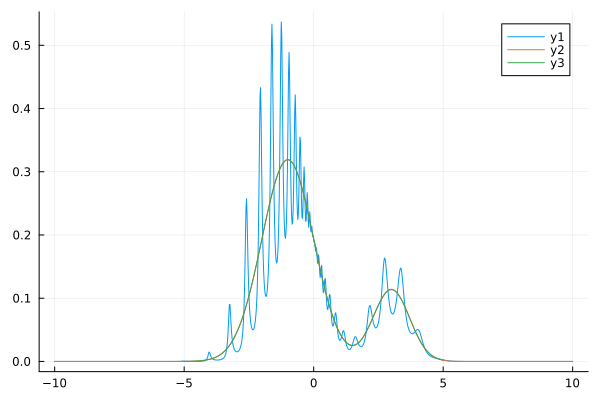

In [10]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [11]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak.svg")

"/home/kosuke/work/Nevanlinna.jl/notebooks/two_peak.svg"